# IMDB Data Storytelling Project

IMDb is an incredible dataset. Started by a Usenet group and maintained to this day mostly by volunteer submissions, it contains information about a staggering number of motion pictures, including feature films, TV shows, even video games. And better yet, they offer much of their data in the form of .tsv files! Looking at what data they offered up, I became interested in IMDb user rating behavior.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline

# Loading Budget/Box Office Data

In [2]:
df_movies_top = pd.read_csv('data/df_movies_top.csv')
box_office = pd.read_csv('data/Box Office Data - Sheet1 (1).csv', 
                         names=['Index','Release_Date','Movie','Production_Budget',
                                'Domestic_Gross','Worldwide_Gross'],
                         index_col='Index')

In [3]:
box_office.shape

(5876, 5)

In [4]:
box_office = box_office.drop(np.nan)

In [5]:
box_office['Release_dt'] = pd.to_datetime(box_office['Release_Date'], errors='coerce', format='%b %d, %Y')

box_office['Release_dt_isna'] = box_office['Release_dt'].isna()

box_office = box_office[box_office['Release_dt_isna'] == 0]

box_office['Release_dt'].isna().sum()

0

In [6]:
box_office.sample(10)

Release_Date                                           Movie  \
Index                                                                 
4,372   Mar 6, 2013                                 Spring Breakers   
1,915  May 14, 2010                               Letters to Juliet   
991    Nov 12, 2004                                After the Sunset   
3,809  Jan 12, 2000                                     Next Friday   
1,305  Apr 29, 2005            The Hitchhiker's Guide to the Galaxy   
624    Dec 21, 2001                                A Beautiful Mind   
1,312  Jan 13, 2006                                    Last Holiday   
315    Jul 26, 2013                                   The Wolverine   
1,169  Jun 10, 2005  The Adventures of Sharkboy and Lavagirl in 3-D   
3,196  Oct 11, 2013                                          Khumba   

      Production_Budget Domestic_Gross Worldwide_Gross Release_dt  \
Index                                                               
4,372        $5,000,000    $14,124,286     $31,149,251 2013-03-06   
1,915       $30,000,000    $53,032,453     $82,148,538 2010-05-14   
991         $57,000,000    $28,328,132     $38,329,114 2004-11-12   
3,809        $9,500,000    $57,176,582     $59,675,307 2000-01-12   
1,305       $45,000,000    $51,019,112    $102,746,214 2005-04-29   
624         $78,000,000   $170,708,996    $317,668,058 2001-12-21   
1,312       $45,000,000    $38,399,961     $43,343,247 2006-01-13   
315        $115,000,000   $132,556,852    $416,456,852 2013-07-26   
1,169       $50,000,000    $39,177,684     $69,425,966 2005-06-10   
3,196       $15,000,000             $0     $20,898,221 2013-10-11   

       Release_dt_isna  
Index                   
4,372            False  
1,915            False  
991              False  
3,809            False  
1,305            False  
624              False  
1,312            False  
315              False  
1,169            False  
3,196            False

In [7]:
box_office['Release_Year'] = box_office['Release_dt'].dt.year

box_office['Release_Year_str'] = box_office['Release_Year'].apply(str)

box_office['Movie_merger'] = box_office['Movie'].str.lower() + ' ' + box_office['Release_Year_str']

In [8]:
box_office.head()

Release_Date                                        Movie  \
Index                                                              
1      May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      Apr 23, 2019                            Avengers: Endgame   
3      Apr 22, 2015                      Avengers: Age of Ultron   
4      Dec 13, 2017            Star Wars Ep. VIII: The Last Jedi   
5      Dec 16, 2015         Star Wars Ep. VII: The Force Awakens   

      Production_Budget Domestic_Gross Worldwide_Gross Release_dt  \
Index                                                               
1          $410,600,000   $241,063,875  $1,045,663,875 2011-05-20   
2          $400,000,000   $858,373,000  $2,795,473,000 2019-04-23   
3          $330,600,000   $459,005,868  $1,403,013,963 2015-04-22   
4          $317,000,000   $620,181,382  $1,316,721,747 2017-12-13   
5          $306,000,000   $936,662,225  $2,053,311,220 2015-12-16   

       Release_dt_isna  Release_Year Release_Year_str  \
Index                                                   
1                False          2011             2011   
2                False          2019             2019   
3                False          2015             2015   
4                False          2017             2017   
5                False          2015             2015   

                                           Movie_merger  
Index                                                    
1      pirates of the caribbean: on stranger tides 2011  
2                                avengers: endgame 2019  
3                          avengers: age of ultron 2015  
4                star wars ep. viii: the last jedi 2017  
5             star wars ep. vii: the force awakens 2015

In [9]:
box_office.shape

(5708, 10)

In [10]:
df_movies_top['startYear_str'] = df_movies_top['startYear'].apply(str)

In [11]:
df_movies_top['Movie_merger'] = df_movies_top['primaryTitle'].str.lower() + ' ' + df_movies_top['startYear_str']

In [12]:
df_movies_top.head()

Unnamed: 0     tconst titleType  \
0           0  tt0000147     movie   
1           1  tt0000574     movie   
2           2  tt0002101     movie   
3           3  tt0002130     movie   
4           4  tt0002199     movie   

                                        primaryTitle  \
0                      The Corbett-Fitzsimmons Fight   
1                        The Story of the Kelly Gang   
2                                          Cleopatra   
3                                    Dante's Inferno   
4  From the Manger to the Cross; or, Jesus of Naz...   

                                       originalTitle  startYear  \
0                      The Corbett-Fitzsimmons Fight       1897   
1                        The Story of the Kelly Gang       1906   
2                                          Cleopatra       1912   
3                                          L'Inferno       1911   
4  From the Manger to the Cross; or, Jesus of Naz...       1912   

   runtimeMinutes                   genres  averageRating  numVotes  ...  \
0            20.0   Documentary,News,Sport            5.1       309  ...   
1            70.0    Biography,Crime,Drama            6.1       537  ...   
2           100.0            Drama,History            5.2       419  ...   
3            68.0  Adventure,Drama,Fantasy            7.0      2014  ...   
4            60.0          Biography,Drama            5.7       437  ...   

   News  Reality-TV  Romance  Sci-Fi  Sport  Thriller  War  Western  \
0     1           0        0       0      1         0    0        0   
1     0           0        0       0      0         0    0        0   
2     0           0        0       0      0         0    0        0   
3     0           0        0       0      0         0    0        0   
4     0           0        0       0      0         0    0        0   

   startYear_str                                       Movie_merger  
0           1897                 the corbett-fitzsimmons fight 1897  
1           1906                   the story of the kelly gang 1906  
2           1912                                     cleopatra 1912  
3           1911                               dante's inferno 1911  
4           1912  from the manger to the cross; or, jesus of naz...  

[5 rows x 40 columns]

In [13]:
df_movies_top.shape

(59386, 40)

In [14]:
# Looks like this technique will work for most of my titles.
# Gotta remember, worst case scenario, I just have to manually match the titles
# in the original .csv for box_office

df_movies_top[df_movies_top['primaryTitle'].str.contains('on stranger tides', case=False)]

Unnamed: 0     tconst titleType  \
38544       38544  tt1298650     movie   

                                      primaryTitle  \
38544  Pirates of the Caribbean: On Stranger Tides   

                                     originalTitle  startYear  runtimeMinutes  \
38544  Pirates of the Caribbean: On Stranger Tides       2011           136.0   

                         genres  averageRating  numVotes  ...  News  \
38544  Action,Adventure,Fantasy            6.6    455834  ...     0   

       Reality-TV  Romance  Sci-Fi  Sport  Thriller  War  Western  \
38544           0        0       0      0         0    0        0   

       startYear_str                                      Movie_merger  
38544           2011  pirates of the caribbean: on stranger tides 2011  

[1 rows x 40 columns]

In [15]:
merged = pd.merge(df_movies_top, box_office, how='left')

In [16]:
merged.head()

Unnamed: 0     tconst titleType  \
0           0  tt0000147     movie   
1           1  tt0000574     movie   
2           2  tt0002101     movie   
3           3  tt0002130     movie   
4           4  tt0002199     movie   

                                        primaryTitle  \
0                      The Corbett-Fitzsimmons Fight   
1                        The Story of the Kelly Gang   
2                                          Cleopatra   
3                                    Dante's Inferno   
4  From the Manger to the Cross; or, Jesus of Naz...   

                                       originalTitle  startYear  \
0                      The Corbett-Fitzsimmons Fight       1897   
1                        The Story of the Kelly Gang       1906   
2                                          Cleopatra       1912   
3                                          L'Inferno       1911   
4  From the Manger to the Cross; or, Jesus of Naz...       1912   

   runtimeMinutes                   genres  averageRating  numVotes  ...  \
0            20.0   Documentary,News,Sport            5.1       309  ...   
1            70.0    Biography,Crime,Drama            6.1       537  ...   
2           100.0            Drama,History            5.2       419  ...   
3            68.0  Adventure,Drama,Fantasy            7.0      2014  ...   
4            60.0          Biography,Drama            5.7       437  ...   

                                        Movie_merger  Release_Date  Movie  \
0                 the corbett-fitzsimmons fight 1897           NaN    NaN   
1                   the story of the kelly gang 1906           NaN    NaN   
2                                     cleopatra 1912           NaN    NaN   
3                               dante's inferno 1911           NaN    NaN   
4  from the manger to the cross; or, jesus of naz...           NaN    NaN   

   Production_Budget  Domestic_Gross  Worldwide_Gross  Release_dt  \
0                NaN             NaN              NaN         NaT   
1                NaN             NaN              NaN         NaT   
2                NaN             NaN              NaN         NaT   
3                NaN             NaN              NaN         NaT   
4                NaN             NaN              NaN         NaT   

   Release_dt_isna  Release_Year  Release_Year_str  
0              NaN           NaN               NaN  
1              NaN           NaN               NaN  
2              NaN           NaN               NaN  
3              NaN           NaN               NaN  
4              NaN           NaN               NaN  

[5 rows x 49 columns]

In [17]:
# Remove missing box office data
gross_not_nan = merged['Domestic_Gross'].isna()-1

box_office = merged[(merged['Domestic_Gross'] != '$0') & gross_not_nan]

In [18]:
# Select desired columns
box_office = box_office[['primaryTitle', 'averageRating',
       'runtimeNumber', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Romance',
       'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'Production_Budget',
       'Worldwide_Gross', 'Release_dt']]

In [19]:
# Convert budget/box office info to numeric
box_office['Production_Budget'] = pd.to_numeric(box_office['Production_Budget'].apply(lambda x: x.strip('$')).str.replace(',',''))
box_office['Worldwide_Gross'] = pd.to_numeric(box_office['Worldwide_Gross'].apply(lambda x: x.strip('$')).str.replace(',',''))

In [20]:
# Remove duplicate of Waltz With Bashir
box_office['duplicated'] = box_office.duplicated(subset=['primaryTitle', 'Release_dt', 'runtimeNumber'], keep='first')
box_office = box_office[box_office['duplicated'] == 0]
box_office = box_office.drop(columns=['duplicated'])

In [21]:
# Consider including only movies released since 1980?
# Let's just agree now that inflation is a problem here, and hope that excluding older movies mitigates the problem somewhat
box_office = box_office[box_office['Release_dt'].dt.year >= 1980]

In [22]:
# Get natural log of target to make normal
box_office['gross_log'] = np.log1p(box_office['Worldwide_Gross'])

In [23]:
# Make IMDb user rating categorical.
# Split into five categories: Terrible, Decent, Good, Great, and Excellent, based on distribution of scores.
def rating_categorical(i):
    if i <= 5.8:
        rating = 'Terrible'
    elif 5.8 < i <= 6.5:
        rating = 'Decent'
    elif 6.5 < i <= 7.1:
        rating = 'Good'
    elif 7.1 < i <= 7.9:
        rating = 'Great'
    elif 7.9 < i:
        rating = 'Excellent'
    
    return rating

box_office['rating_cat'] = box_office['averageRating'].apply(rating_categorical)

In [24]:
# import category_encoders as ce
# encoder = ce.OrdinalEncoder(cols='rating_cat', mapping = {'rating_cat':'rating_ordinal', 
#                                                           'mapping': {'Terrible':1,
#                                                                      'Decent':2,
#                                                                      'Good':3,
#                                                                      'Great':4,
#                                                                      'Excellent':5}})
# encoder.fit(box_office)

In [25]:
box_office.head()

primaryTitle  averageRating  runtimeNumber  Action  Adventure  \
12397             Airplane!            7.7           88.0       0          0   
12427       The Blue Lagoon            5.8          104.0       0          1   
12428    The Blues Brothers            7.9          133.0       0          1   
12440            Caddyshack            7.3           98.0       0          0   
12444  Can't Stop the Music            4.1          124.0       0          0   

       Animation  Biography  Comedy  Crime  Documentary  ...  Sci-Fi  Sport  \
12397          0          0       1      0            0  ...       0      0   
12427          0          0       0      0            0  ...       0      0   
12428          0          0       1      1            0  ...       0      0   
12440          0          0       1      0            0  ...       0      1   
12444          0          1       1      0            0  ...       0      0   

       Thriller  War  Western  Production_Budget  Worldwide_Gross  Release_dt  \
12397         0    0        0            3500000         83453539  1980-07-04   
12427         0    0        0            4500000         47923795  1980-06-20   
12428         0    0        0           27000000         57229890  1980-06-20   
12440         0    0        0            6000000         39846344  1980-07-25   
12444         0    0        0           20000000          2000000  1980-06-20   

       gross_log  rating_cat  
12397  18.239801       Great  
12427  17.685123    Terrible  
12428  17.862587       Great  
12440  17.500541       Great  
12444  14.508658    Terrible  

[5 rows x 30 columns]

In [26]:
box_office.to_csv('box_office.csv')

box_office is the dataset that we'll be working with. <3

# Data Exploration

In [27]:
import pandas_profiling

In [28]:
profile = box_office.profile_report()

In [29]:
profile

In [30]:
box_office.shape

(3912, 30)

In [31]:
box_office.head()

primaryTitle  averageRating  runtimeNumber  Action  Adventure  \
12397             Airplane!            7.7           88.0       0          0   
12427       The Blue Lagoon            5.8          104.0       0          1   
12428    The Blues Brothers            7.9          133.0       0          1   
12440            Caddyshack            7.3           98.0       0          0   
12444  Can't Stop the Music            4.1          124.0       0          0   

       Animation  Biography  Comedy  Crime  Documentary  ...  Sci-Fi  Sport  \
12397          0          0       1      0            0  ...       0      0   
12427          0          0       0      0            0  ...       0      0   
12428          0          0       1      1            0  ...       0      0   
12440          0          0       1      0            0  ...       0      1   
12444          0          1       1      0            0  ...       0      0   

       Thriller  War  Western  Production_Budget  Worldwide_Gross  Release_dt  \
12397         0    0        0            3500000         83453539  1980-07-04   
12427         0    0        0            4500000         47923795  1980-06-20   
12428         0    0        0           27000000         57229890  1980-06-20   
12440         0    0        0            6000000         39846344  1980-07-25   
12444         0    0        0           20000000          2000000  1980-06-20   

       gross_log  rating_cat  
12397  18.239801       Great  
12427  17.685123    Terrible  
12428  17.862587       Great  
12440  17.500541       Great  
12444  14.508658    Terrible  

[5 rows x 30 columns]

Text(0.5, 1.0, 'Worldwide Gross, in log-dollars')

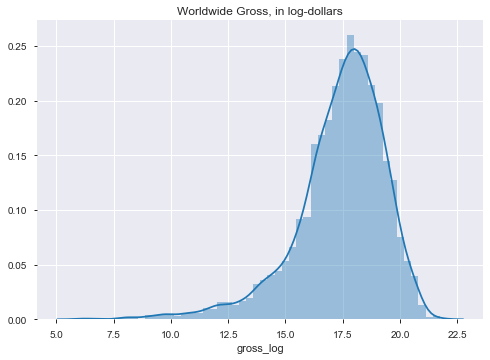

In [32]:
sns.distplot(box_office['gross_log'])
plt.title('Worldwide Gross, in log-dollars')

In [33]:
box_office['release_year'] = box_office['Release_dt'].dt.year
box_office['release_month'] = box_office['Release_dt'].dt.month

In [34]:
# Train/Validate/Test split by year
train = box_office[box_office['Release_dt'].dt.year < 2009]
val = box_office[(box_office['Release_dt'].dt.year < 2014) & (box_office['Release_dt'].dt.year >= 2009)]
test = box_office[box_office['Release_dt'].dt.year >= 2014]

In [35]:
target = 'gross_log'

In [36]:
train.shape

(2354, 32)

In [37]:
val.shape

(792, 32)

In [38]:
test.shape

(766, 32)

In [39]:
2354 + 792 + 766
# My train/validate/test split appears to have worked!

3912

In [40]:
# Mean worldwide gross in log-dollars
train[target].mean()

17.25923402478346

In [41]:
import math
from sklearn.metrics import mean_squared_error

# Baseline? What's my mean?
y_mean = train[target].mean()

# What's my mean squared error if I always guess the mean?
y_pred = pd.Series(y_mean for _ in range(len(val[target])))
mse = mean_squared_error(val[target], y_pred)

In [42]:
# Mean squared error for mean baseline = 4.55 log-dollars
mse

4.555124292593721

In [43]:
# Does this give me the MSE in dollars? Seems impossibly accurate...
np.expm1(mse)

94.11857703553248

In [44]:
X_train = train.drop(columns=[target, 'Worldwide_Gross', 'Release_dt', 'primaryTitle', 'rating_cat'])
y_train = train[target]
X_val = val.drop(columns=[target, 'Worldwide_Gross', 'Release_dt', 'primaryTitle', 'rating_cat'])
y_val = val[target]
X_test = test.drop(columns=[target, 'Worldwide_Gross', 'Release_dt', 'primaryTitle', 'rating_cat'])
y_test = test[target]

In [45]:
X_train.head()

averageRating  runtimeNumber  Action  Adventure  Animation  Biography  \
12397            7.7           88.0       0          0          0          0   
12427            5.8          104.0       0          1          0          0   
12428            7.9          133.0       0          1          0          0   
12440            7.3           98.0       0          0          0          0   
12444            4.1          124.0       0          0          0          1   

       Comedy  Crime  Documentary  Drama  ...  News  Romance  Sci-Fi  Sport  \
12397       1      0            0      0  ...     0        0       0      0   
12427       0      0            0      1  ...     0        1       0      0   
12428       1      1            0      0  ...     0        0       0      0   
12440       1      0            0      0  ...     0        0       0      1   
12444       1      0            0      0  ...     0        0       0      0   

       Thriller  War  Western  Production_Budget  release_year  release_month  
12397         0    0        0            3500000          1980              7  
12427         0    0        0            4500000          1980              6  
12428         0    0        0           27000000          1980              6  
12440         0    0        0            6000000          1980              7  
12444         0    0        0           20000000          1980              6  

[5 rows x 27 columns]

In [46]:
y_train.head()

12397    18.239801
12427    17.685123
12428    17.862587
12440    17.500541
12444    14.508658
Name: gross_log, dtype: float64

# Fitting xgboost Model

In [47]:
from xgboost import XGBRegressor

In [48]:
gb = XGBRegressor(n_estimators=100, n_jobs=-1)
gb.fit(X_train, y_train)

[21:43:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [49]:
y_pred = gb.predict(X_val)

In [50]:
y_pred

array([18.855772 , 17.236538 , 19.099909 , 19.181389 , 16.888264 ,
       17.654638 , 18.348654 , 17.568031 , 18.723486 , 17.918226 ,
       18.703749 , 20.242363 , 19.58417  , 19.485094 , 20.40959  ,
       18.587494 , 19.582497 , 17.345297 , 18.866325 , 18.99305  ,
       20.45397  , 19.371696 , 19.948149 , 18.269978 , 19.405952 ,
       18.098692 , 19.16975  , 17.559944 , 17.930069 , 17.844542 ,
       19.39551  , 17.689877 , 18.954664 , 19.953949 , 19.974693 ,
       17.476555 , 17.779871 , 16.223938 , 18.92922  , 18.158033 ,
       19.052073 , 16.564947 , 18.571293 , 17.047836 , 18.610182 ,
       19.086021 , 17.814013 , 17.770967 , 17.588985 , 18.629917 ,
       19.56387  , 17.611357 , 17.606354 , 17.389536 , 16.979492 ,
       20.17907  , 17.424574 , 18.3099   , 17.60978  , 17.476173 ,
       17.947586 , 17.03928  , 20.218927 , 18.095654 , 17.40466  ,
       17.149233 , 19.513737 , 18.369555 , 18.888477 , 17.986551 ,
       17.93408  , 16.738174 , 14.252883 , 18.734491 , 19.2184

In [51]:
mse = mean_squared_error(y_val, y_pred)
mse

1.7927310383055173

In [52]:
mean_squared_error(y_train, gb.predict(X_train))

1.226353408765509

In [53]:
# MSE for XGBRegressor = 1.79 log-dollars
np.expm1(mse)

5.005832247221522

# Get Permutation Importances for XGBoost model

In [54]:
import eli5
from eli5.sklearn import PermutationImportance
# Model already fit with train data
permuter = PermutationImportance(
    gb,
    scoring='neg_mean_squared_error',
    n_iter=5
)
permuter.fit(X_val, y_val)

PermutationImportance(cv='prefit',
                      estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1, gamma=0,
                                             importance_type='gain',
                                             learning_rate=0.1,
                                             max_delta_step=0, max_depth=3,
                                             min_child_weight=1, missing=None,
                                             n_estimators=100, n_jobs=-1,
                                             nthread=None,
                                             objective='reg:linear',
                                             random_state=0, reg_alpha=0,
                                             reg_lambda=1, scale_pos_weight=1,
                                      

In [55]:
permuter.feature_importances_

array([ 5.42923133e-01, -4.76306565e-02,  0.00000000e+00,  0.00000000e+00,
        5.50409130e-04,  6.19577826e-02,  7.84786066e-03,  8.63804672e-03,
        7.28920860e-05,  6.62333728e-02,  3.42463625e-03,  1.43509617e-03,
       -1.40824650e-03,  4.52095592e-02,  2.22011412e-03,  1.11136024e-03,
        2.67129506e-02, -2.70888206e-03, -1.94932319e-03,  1.12373903e-03,
        6.84031007e-05, -8.64293012e-04,  6.31342378e-02,  1.39367153e-03,
        4.16278501e+00,  0.00000000e+00,  8.50335676e-02])

In [56]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_val.columns.tolist())

# PDP for XGBoost

In [57]:
plt.rcParams['figure.dpi'] = 72

In [58]:
from pdpbox.pdp import pdp_isolate, pdp_plot

## Budget

In [59]:
feature='Production_Budget'

isolated = pdp_isolate(
    model = gb,
    dataset = X_val,
    model_features = X_val.columns,
    feature = feature
)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x24088938518>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2408897d128>})

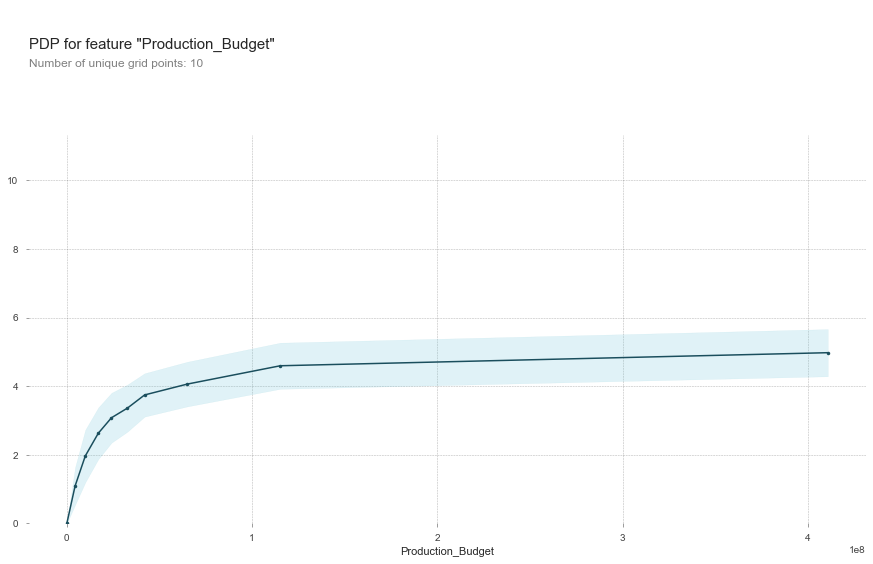

In [60]:
pdp_plot(isolated, feature_name=feature)

(0, 200000000)

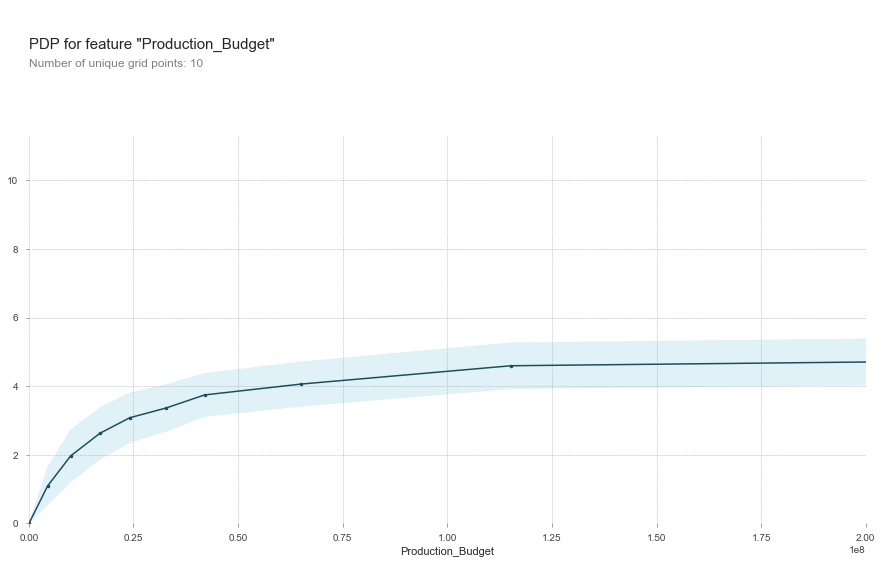

In [61]:
pdp_plot(isolated, feature_name=feature)
plt.xlim(0,200000000)

(0, 100000000)

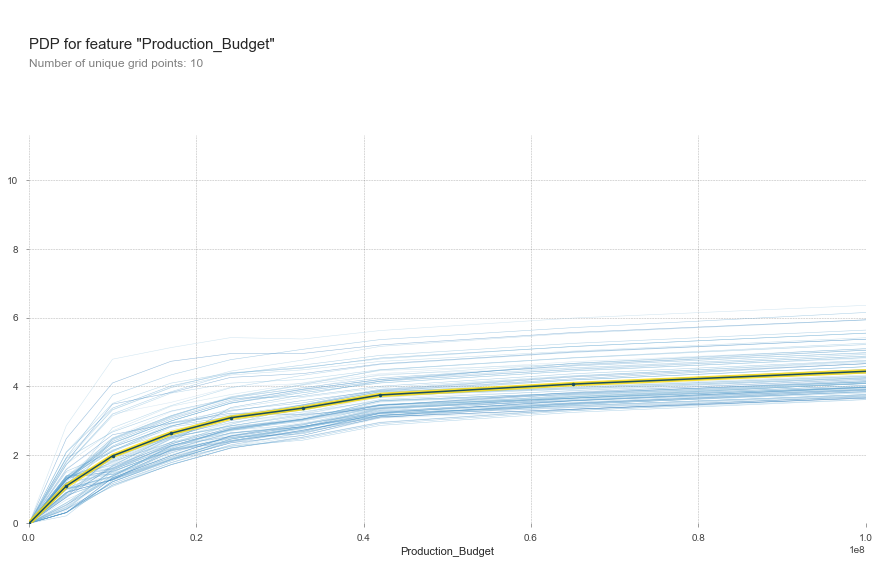

In [62]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100)
plt.xlim(0,100000000)

In [63]:
isolated = pdp_isolate(model=gb,
                      dataset = X_val,
                      model_features = X_val.columns,
                      feature = feature,
                      num_grid_points = 50)

(0, 100000000)

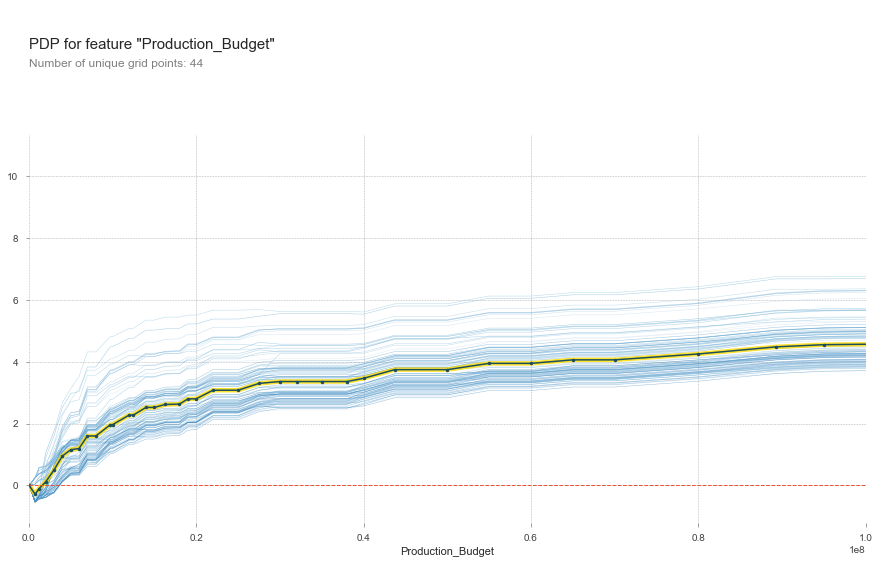

In [64]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100)
plt.xlim(0,100000000)

In [65]:
grid = isolated.feature_grids
pdp = isolated.pdp

In [66]:
lines = isolated.ice_lines.sample(100).T

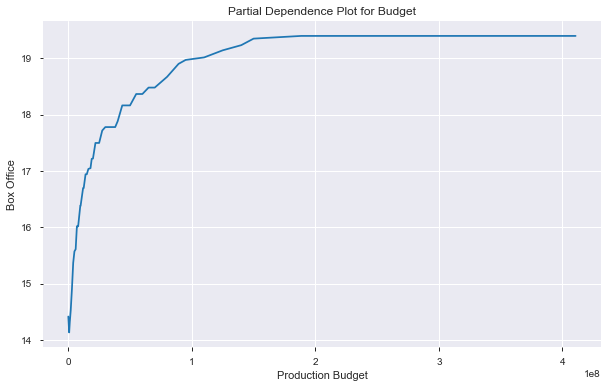

In [67]:
plt.figure(figsize=(10,6))
plt.plot(grid, pdp)
plt.ylabel('Box Office')
plt.xlabel('Production Budget')
plt.title('Partial Dependence Plot for Budget');

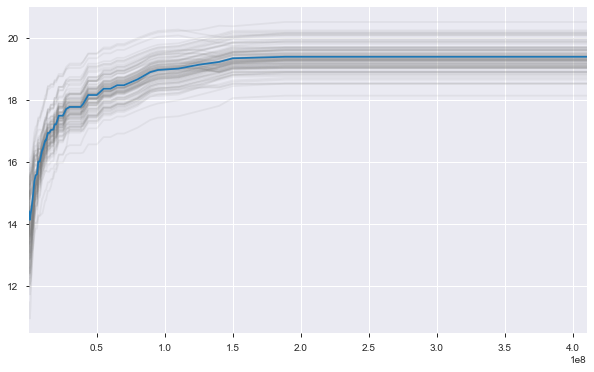

In [68]:
lines.plot(color='grey', alpha=0.1, legend=False, figsize=(10,6))
plt.plot(grid, pdp)

## Average Rating

In [69]:
feature = 'averageRating'

isolated = pdp_isolate(
    model = gb,
    dataset = X_val,
    model_features = X_val.columns,
    feature = feature
)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2408906c940>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x240839a0eb8>})

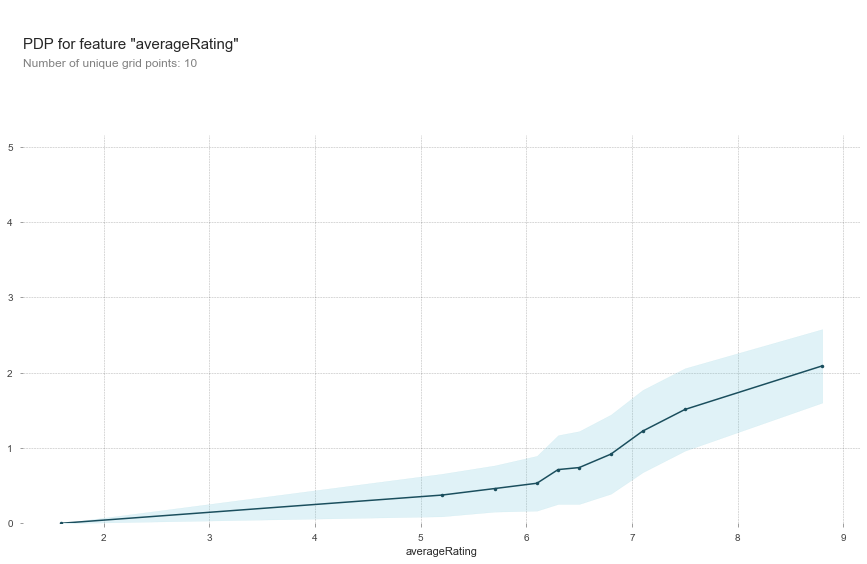

In [70]:
pdp_plot(isolated, feature_name=feature)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x240871c4588>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x24087175710>})

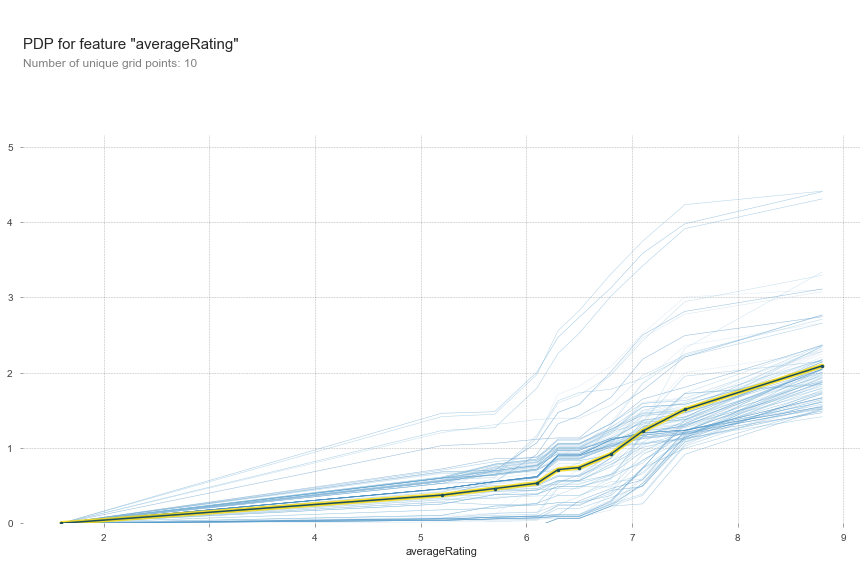

In [71]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100)

In [72]:
isolated = pdp_isolate(model=gb,
                      dataset = X_val,
                      model_features = X_val.columns,
                      feature = feature,
                      num_grid_points = 50)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x240893852b0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x240860c0eb8>})

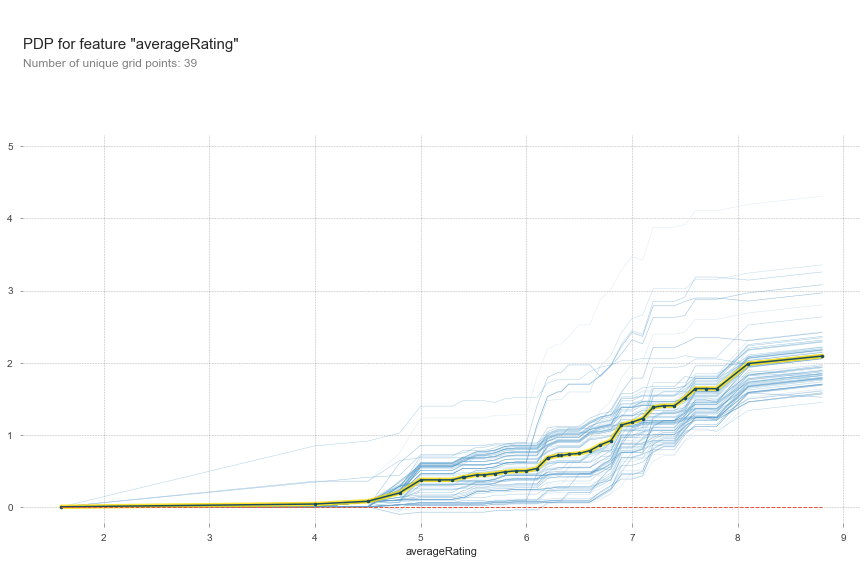

In [73]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100)

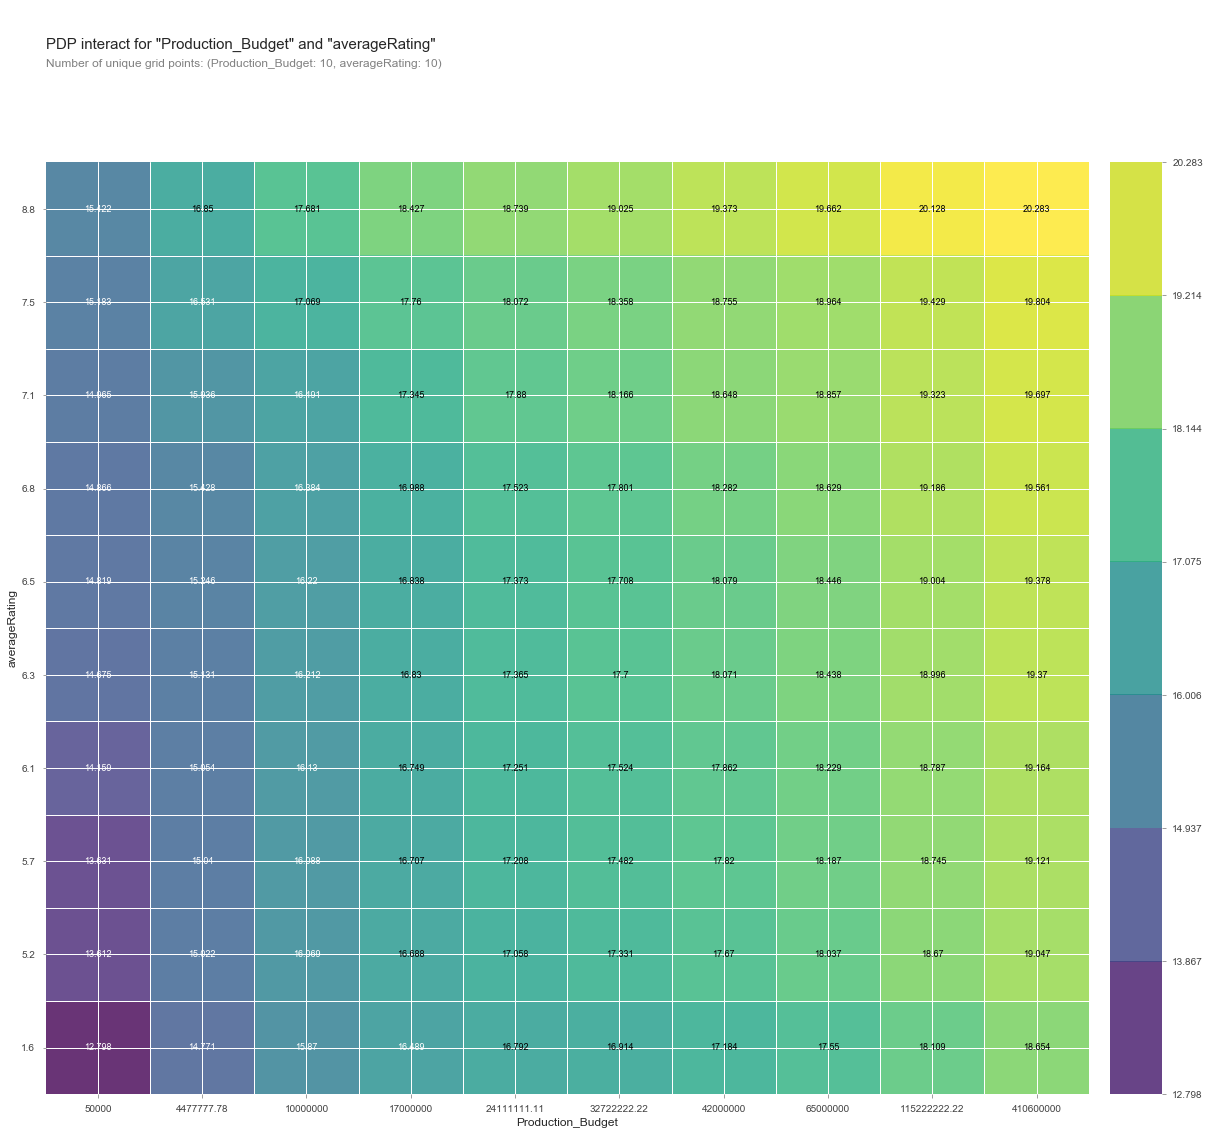

In [109]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['Production_Budget', 'averageRating']

interaction = pdp_interact(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

plt = pdp_interact_plot(interaction, plot_type='grid', feature_names=features, figsize=(20,20))

# Fitting Linear Regression model?

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
y_pred = lr.predict(X_val)
y_pred

array([18.4598842 , 16.67319162, 18.81210519, 18.18016997, 16.25202038,
       16.99891699, 18.43019111, 16.99548047, 18.83120079, 16.90915731,
       18.95165397, 24.39895085, 24.11488078, 21.1686114 , 24.72860341,
       17.97863038, 19.89390775, 17.03006622, 18.25479677, 19.71905475,
       23.23083119, 20.02813532, 21.67348679, 17.7216959 , 19.54293295,
       17.70146606, 20.06882251, 17.21052397, 17.3514146 , 17.36750306,
       19.83035223, 17.38228307, 18.88467645, 20.3202697 , 20.40859392,
       16.71697703, 17.36362926, 16.16016279, 18.53314925, 17.50944858,
       19.29903452, 16.48478992, 17.78767068, 17.25967765, 18.15122394,
       18.98850587, 17.14540906, 17.14147056, 16.88804422, 18.29785068,
       20.78534014, 17.24798767, 17.00329378, 16.50570515, 16.84974013,
       23.96914842, 17.23030274, 17.98311353, 16.70435008, 16.92842626,
       17.62486077, 16.86781864, 22.94139694, 17.54528244, 16.38910637,
       16.27922995, 19.80830633, 17.61449549, 20.14900085, 17.46

In [110]:
mse = mean_squared_error(y_val, y_pred)
mse

2.750646216563333

Seems to give me very similar output. Interesting...
I must wonder if there's something wrong with my MSE display. Getting exactly the same MSE for XGBoost and linear regression seems odd. But the y_pred arrays are very similar though slightly different...

EDIT: Of course I was forgetting to reassign to the variable! :D

# SHAP

In [81]:
row = X_test.iloc[[0]]
row

averageRating  runtimeNumber  Action  Adventure  Animation  Biography  \
28908            6.5          114.0       1          0          0          0   

       Comedy  Crime  Documentary  Drama  ...  News  Romance  Sci-Fi  Sport  \
28908       0      1            0      1  ...     0        0       0      0   

       Thriller  War  Western  Production_Budget  release_year  release_month  
28908         0    0        0           28000000          2014              9  

[1 rows x 27 columns]

In [86]:
y_test.iloc[[0]]

28908    17.944395
Name: gross_log, dtype: float64

Test just to make sure my logging and reverse logging works as intended. 62,108,587 is indeed the box office take for the film indexed 28908, A Walk Among The Tombstones

In [87]:
np.expm1(y_test.iloc[[0]])

28908    62108587.0
Name: gross_log, dtype: float64

In [89]:
gb.predict(row)

array([17.042427], dtype=float32)

In [91]:
import shap

explainer = shap.TreeExplainer(gb)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)

In [92]:
shap_values

array([[-1.5854932e-01,  2.7149232e-02,  0.0000000e+00,  0.0000000e+00,
         5.2945333e-04,  1.0265086e-02, -3.5418145e-02, -4.6009310e-02,
        -3.9441051e-04, -2.0745079e-01, -8.3763376e-03,  8.2951759e-05,
         4.9540731e-03, -3.6235012e-02, -4.9241637e-03,  1.8831754e-04,
        -7.5382912e-03, -8.2923492e-05, -1.0190322e-02,  6.7604287e-03,
         9.0770313e-04, -1.5276399e-03,  1.6993178e-02,  6.8368873e-04,
         4.2569068e-01,  1.7869247e-02, -2.1201068e-01]], dtype=float32)